# ИССЛЕДОВАНИЕ РЫНКА КОМПЬЮТЕРНЫХ ИГР

с целью определения фаворитов следующего года и планирования рекламной компании
  
<b>ПЛАН ИССЛЕДОВАНИЯ:</b>

1. Подготовка данных

2. Исследовательский анализ данных:<br>
     выбор периода исследования<br>
     определение наиболее популярных платформ и жанров<br>
     анализ влияния оценок пользователей и критиков на продажи игр<br>

3. Составление портрета пользователей отдельных регионов

4. Исследование статистических показателей оценок пользователей и критиков

5. Проверка гипотез о различии пользовательских рейтингов различных платформ/жанров

# ШАГ 1

# ПОДГОТОВКА ДАННЫХ

Импортируем нужные библиотеки, открываем датасет и бросаем на него первый взгляд.
Изменяем названия столбцов (приводим к нижнему регистру), разбираемся с пропущенными данными, приводим данные к нужным типам.

In [ ]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
games_data = pd.read_csv('/datasets/games.csv')

In [ ]:
# переводим названия столбцов в нижний регистр
games_data.columns = games_data.columns.str.lower()
# смотрим первичную информацию о датафрейме
print(games_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [ ]:
#выводим первые 5 строк датафрейма
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Уже по информации о датафрейме видим, что есть некоторое количество пропусков в столбцах **name, year_of_release, genre** и большое количество пропусков в столбцах **critic_score, user_score** и **rating**.
1. В следующем блоке разберемся с пропусками в **name** и **genre**. Как видим, эти пропуски идут в паре и относятся к платформе GEN. Отфильтруем строки датафрейма, относящиеся к данной платформе и внимательно на них посмотрим. Как видим, все они относятся к периоду с 1991 по 1994 год, далее же эта платформа не встречается. Очевидно, что она "вымерла" и никак не может повлиять на наши решение о рекламных кампаниях на 2017 год. Все данные о GEN пока удалять подождем (скорее всего, мы сделаем это позже), а вот эти две строчки с пропущенными названием и жанром игры можем удалить без зазрения совести - никакой полезной информации они нам не несут.
2. Если же посмотреть, на **year_of_release**, то первая пришедшая мне в голову гипотеза об отсутствии этих данных о каких-то совсем древних играх оказалась неверной, т.к. названия некоторых игр показывают, что они выпущены в ХХI веке. Посмотрим, по скольки строкам нам не известен год выпуска. 269 из 16715 (около 2%) - вроде бы немного, да и доминирования в этом срезе какой-то одной платформы или одного жанра на первый взгляд тоже не наблюдается. Т.е. имеем 2% строк с пропущенными значениями, не являющихся уникальными в чем-либо. ВЕРДИКТ - УДАЛИТЬ.
**Т.о. теперь у нас остаются пропуски только в столбцах с различными типами оценок.**

In [ ]:
# находим строчки с пропущенными названиями
# находим строчки с платформы GEN, по которой пропущены названия
print(games_data[games_data['name'].isnull()])
print('')
print(games_data[games_data['platform']=='GEN']['year_of_release'])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  

145      1992.0
257      1991.0
564      1992.0
588      1990.0
659      1993.0
832      1992.0
960      1994.0
996      1994.0
1099     1992.0
1365     1994.0
1453     1994.0
1842     1994.0
6451     1994.0
7885     1993.0
8893     1993.0
9000     1994.0
9563     1992.0
9787     1992.0
11563    1994.0
11660    1994.0
11986    1993.0
12098    1993.0
12264    1993.0
12984    1993.0
13343    1993.0
14085    1994.0
14132    1994.0
14244    1993.0
14488    1994.0
Name: year_of_release, dtype: float64


In [ ]:
#смотрим пропущенные значения по столбцу year_of_release
print(games_data[games_data['year_of_release'].isnull()].count())
print(games_data[games_data['year_of_release'].isnull()])

name               269
platform           269
year_of_release      0
genre              269
na_sales           269
eu_sales           269
jp_sales           269
other_sales        269
critic_score       154
user_score         175
rating             181
dtype: int64
                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi

In [ ]:
#удаляем строки с неизвестными названием и жанром игры (таких строк 2)
games_data.dropna(subset=['name', 'genre'], inplace=True)

#удаляем строки с пропущенными годами выпуска
games_data.dropna(subset=['year_of_release'], inplace=True)

#заменяем тип данных в столбцах year_of_release (с флоат на инт32, т.к. год - целое число) и user_score (с object на float,
#т.к. оценки представляют собой действительное число
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')
games_data['year_of_release'] = games_data['year_of_release'].astype('int32')
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int32
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


# Продолжаем первичную обработку датафрейма
На данный момент имеем 16444 строки. Пропущенные значения у нас только в столбцах с оценками - причем пропущено около половины значений.


Теперь попробуем разобраться с пропусками в трех столбцах с оценками - хотя бы понять их природу. Можно предположить, что просто оценки начали проставляться с какого-то конкретного момента (года). Проверим это, посмотрев описательные статистики годов, по которым оценки отсутствуют и имеются (два следующих блока).


Как видим, попадаются и имеющиеся оценки в 80-ых годах, и отстуствующие оценки в ХХI веке, так что эта гипотеза неверна. 


Но сделать с этими пропусками мы на данном этапе ничего не можем. Удалять нельзя, т.к. мы потеряем важную информацию по продажам в зависимости от жанра и платформы. Заполнить средним значением по всему датафрейму тоже не можем, т.к. помешает нам верно оценить влияние оценок на сборы. 


**Вывод: с пропущенными значениями в столбцах с оценками ничего не делаем. В той части анализа, в которой они нам понадобятся, мы просто отфильтруем NaN и будем работать с заполненными строками.**

In [ ]:
print('Расчет статистик по годам с отсутствующими оценками')
print('')
print('отсутствует critic_score')
print(games_data[games_data['critic_score'].isnull()]['year_of_release'].describe())
print('')
print('отсутствует user_score')
print(games_data[games_data['user_score'].isnull()]['year_of_release'].describe())
print('')
print('отсутствует rating')
print(games_data[games_data['rating'].isnull()]['year_of_release'].describe())




Расчет статистик по годам с отсутствующими оценками

отсутствует critic_score


NameError: ignored

In [ ]:
print('Расчет статистик по годам с имеющимися оценками')
print('')
print('отсутствует critic_score')
print(games_data[games_data['critic_score'].isnull() == False]['year_of_release'].describe())
print('')
print('отсутствует user_score')
print(games_data[games_data['user_score'].isnull() == False]['year_of_release'].describe())
print('')
print('отсутствует rating')
print(games_data[games_data['rating'].isnull() == False]['year_of_release'].describe())

In [ ]:
# посчитаем суммарные продажи
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.describe()

In [ ]:
#разберемся с tbd в столбцах с оценками
print(games_data[games_data['critic_score'] == 'tbd'].head())
print('')
print(games_data[games_data['user_score'] == 'tbd'].head())
print('')
print(games_data[games_data['rating'] == 'tbd'].head())

Как видим, tbd встречается только в столбце user_score. И это ж неспроста!

Достаточно очевидно, что для корректного выявления пользовательского рейтинга любой игры надо собрать некое минимально достоверное количество оценок. Думаю, TBD как раз и означает, что данной игре на данный момент оценку выставило недостаточное количество пользователей.

Таким образом, с точки зрения нашего исследования TBD - почти то же самое, что NaN. Делать мы с ним ничего не будем, т.к. при расчете числовых показателей такие строки будут игнорироваться Python'ом.

# ИТОГОВЫЕ ВЫВОДЫ ПО ШАГУ 1
1. У нас достаточно большая выборка - 16715 строк
2. В ней немало пропущенных данных. Часть из них (около 2% мы удалили), но с пропусками в столбцах с оценками мы пока ничего сделать не можем, т.к. их удаление сократит датафрейм наполовину и приведет к потере важной информации по другим столбцам.

# ШАГ 2. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ
1. Анализ кол-ва выпущенных игр по годам
2. Анализ кол-ва выпущенных игр по платформам
3. Анализ кол-ва выпущенных игр по годам для наиболее популярных платформ


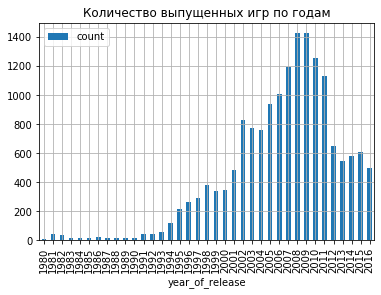

In [ ]:
#сделаем сводную таблицу релизов по годам. Посчитаем кол-во релизов в год и сумму
games_per_year = games_data.pivot_table(values='total_sales', index='year_of_release', 
                                        aggfunc={'count', 'sum'})
games_per_year.reset_index(drop=False, inplace=True)
#построим график количества релизов игр по годам
games_per_year.plot(x='year_of_release', y='count', kind='bar', grid=True, 
                    title='Количество выпущенных игр по годам')


# Первые выводы о возможности сокращения датафрейма
**по итогам анализа кол-ва выпущенных игр по годам**


Уже из этого графика можно предположить, что данные, предшествующие 1995 году вряд ли окажут влияние на нашу рекламную кампанию. Это подтверждается и суммарным кол-вом строк, относящихся к этому периоду, подсчитанному в следующей ячейке.
Более точный ответ на данный вопрос мы получим, когда будем анализировать различные платформы.


Так же можно предположить, что рынок игр в период с 2005 по 2011 год серьезно отличался от рынка после 2011 года - мы видим, что стало выпускаться значительно меньше игр. Возможно, нам стоит ограничиться для анализа лишь 5 последними годами.

In [ ]:
print('Кол-во игр, выпущенных не позднее 1995 года', games_per_year[games_per_year['year_of_release'] <= 1995]['count'].sum())
print('Общее кол-во игр в рассматриваемом датафрейме', games_per_year['count'].sum())
print('Доля игр, выпущенных не позднее 1995 года, в общем объеме данных {:.1%}'.format( 
      games_per_year[games_per_year['year_of_release'] <= 1995]['count'].sum() / games_per_year['count'].sum()))

print('Кол-во игр, выпущенных после 2011 года', games_per_year[games_per_year['year_of_release'] > 2011]['count'].sum())
print('Доля игр, выпущенных после 2011 года, в общем объеме данных {:.1%}'.format( 
      games_per_year[games_per_year['year_of_release'] > 2011]['count'].sum() / games_per_year['count'].sum()))

Кол-во игр, выпущенных не позднее 1995 года 705
Общее кол-во игр в рассматриваемом датафрейме 16444
Доля игр, выпущенных не позднее 1995 года, в общем объеме данных 4.3%
Кол-во игр, выпущенных после 2011 года 2886
Доля игр, выпущенных после 2011 года, в общем объеме данных 17.6%


In [ ]:
# сделаем сводную таблицу релизов по платформам. Посчитаем кол-во релизов по каждой платформе и сумму сборов в разрезе платформ 
games_per_platform = games_data.pivot_table(values='total_sales', index='platform', aggfunc={'count', 'sum'})
games_per_platform.reset_index(drop=False, inplace=True)
# отсортируем по кол-ву релизов игр на платформе и распечатаем 10 самых популярных
games_per_platform.sort_values(by='count', ascending=False, inplace=True)
print(games_per_platform.head(10))
# сохраним и распечатаем список самых популярных платформ имеющегося датафрейма
popular_platforms = games_per_platform[games_per_platform['count'] >= 800]['platform'].to_list()
print(popular_platforms)

   platform  count      sum
16      PS2   2127  1233.56
4        DS   2121   802.78
17      PS3   1306   931.34
26      Wii   1286   891.18
28     X360   1232   961.24
19      PSP   1193   289.53
15       PS   1190   727.58
13       PC    957   255.76
6       GBA    811   312.88
29       XB    803   251.57
['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB']


гистограммы кол-ва релизов по каждой платформе по годам


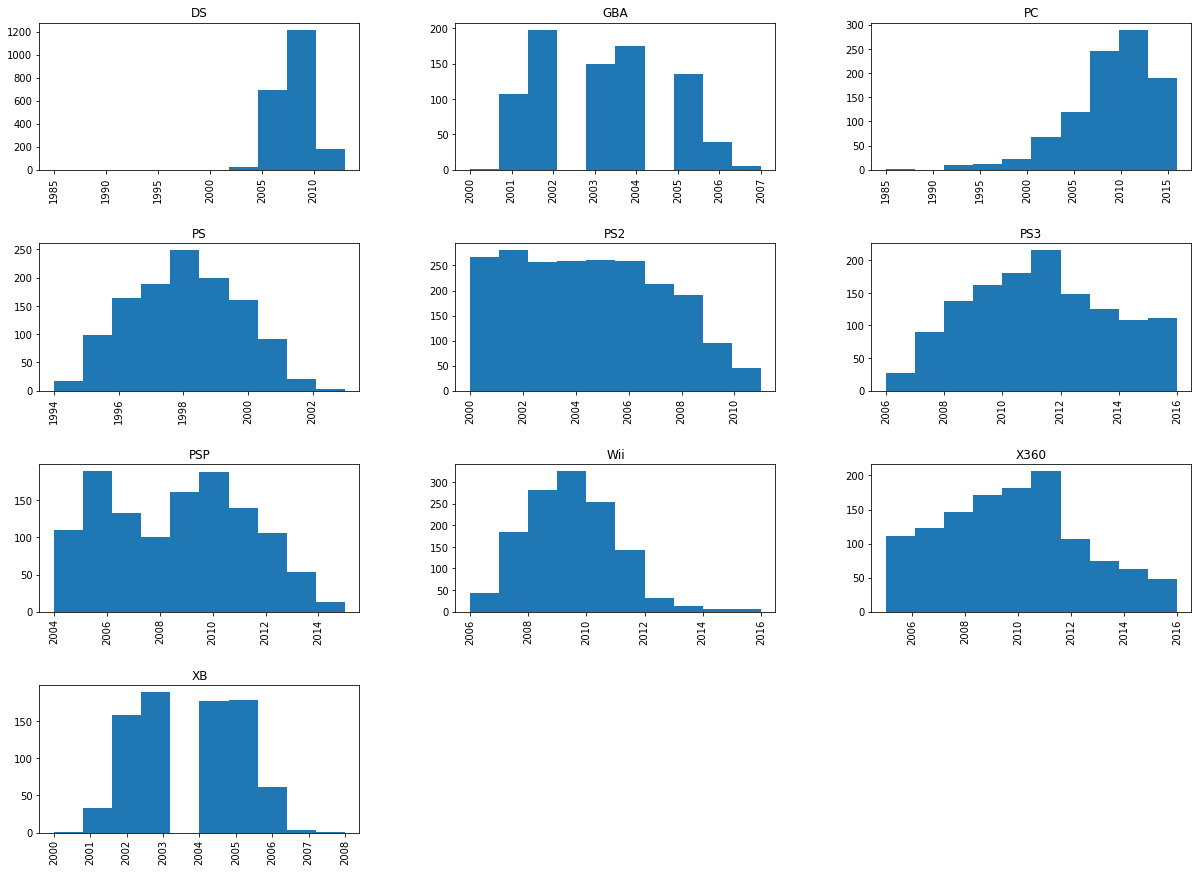

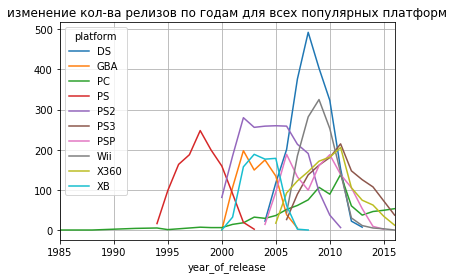

In [ ]:
# для каждой платформы из списка самых популярных построим гистограмму кол-ва выпущенных игр по годам
games_data.query('platform in @popular_platforms').hist(column='year_of_release', by='platform', 
                                                        figsize=(20,15), grid=True)
print('гистограммы кол-ва релизов по каждой платформе по годам')
games_py_pp = games_data.query('platform in @popular_platforms').pivot_table(values='total_sales', 
                                    index=['year_of_release'], columns='platform', aggfunc='count')
#games_py_pp.reset_index(drop=False, inplace=True) 

#games_py_pp.head()
games_py_pp.plot(grid=True, title='изменение кол-ва релизов по годам для всех популярных платформ')

plt.show()
#for item in popular_platforms:
#    g_py_pp = games_data[games_data['platform'] == item].pivot_table(values='name', index='year_of_release', aggfunc='count')
#    g_py_pp.reset_index(drop=False, inplace=True)    
#    g_py_pp.plot(x='year_of_release', y='name', kind='scatter', title='Распределение по годам релизов игр на платформе '+item)

# Итоговое решение по сокращению датафрейма
**по итогам анализа кол-ва выпущенных игр по годам на наиболее популярных платформах**


Как видим, многие некогда популярные платформы на данный момент уже устарели - новые игры на них не выпускаются. К таковым относятся, например, N64, GS, GBA, XB и другие. При этом визуально наблюдаемое "время жизни" платформ составляет около 10 лет (исключением является PC, но все мы понимаем, что PC 1985 года и PC 2016 года - это по сути разные платформы). При этом на пике платформа находится не более 5 лет, затем ее вытесняют более современные платформы. Это уже второй прозрачный намек на то, что при планировании рекламной кампании 2017 года нам следует ограничиться данными за 5 последних лет. Так и сделаем. 

*Заодно посмотрим на:*

1) кол-во игр, попавших в этот срез

2) степень заполненности информации об оценках (мы помним, что там было много пропусков)

3) попавшие в этот срез платформы.


*Что мы видим интересного:*

1) мы взяли 5 лет из 30 (около 17%) и у нас осталось 17% строк в таблице

2) информация об оценках как была пропущена примерно в половине случаев, так и осталась

3) платформ у нас осталось всего 11

In [ ]:
# отфильтровываем в финальный датафрейм для анализа строки только за последние 5 лет
games_data_fin = games_data[games_data['year_of_release'] > 2011]
print(games_data_fin.info())
print('')
print('Количество игр, выпущенных за последние 5 лет', games_data_fin.shape[0])
print('Актуальные платформы последних 5 лет ', games_data_fin['platform'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null int32
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       1312 non-null float64
user_score         1531 non-null float64
rating             1611 non-null object
total_sales        2886 non-null float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.8+ KB
None

Количество игр, выпущенных за последние 5 лет 2886
Актуальные платформы последних 5 лет  ['PS3' 'X360' 'PS4' '3DS' 'DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'PSP']


# Первичный анализ продаж
Теперь можем перейти к тому, ради чего все это затевалось - к продажам. **Посчитаем суммарные и медианные продажи в разрезе год+платформа.**


Мы видим, что в последние годы продажи падают абсолютно по всем платформам. Мы уже отмечали ранее, что игровой бум остался в 2005-2011 годах - с тех пор рынок упал почти в 5 раз, а падение рынка в пределах последней пятилетки составляет 200%. Так что ориентироваться на абсолютные значения при выборе платформ-фаворитов 2017 года не стоит. Лучше смотреть на долю рынка - падает она или растет.


Тут уже интереснее:

1) явным лидером со все возрастающей долей рынка является платформа **PS4**, в 2016 году забравшая себе более половины продаж

2) ближайшими конкурентами со стабильной долей рынка являются **XOne** (20% в 2016 году) и **3DS** (11%)

3) остальные 6 платформ, не "умерших" к 2016 году, вряд ли можно назвать потенциально прибыльными в 2017 году, т.к. их доля рынка либо стабильно падает, либо мала и не растет

4) существенной разницы в медианных сборах с одной игры у тройки лидеров нет. Гораздо лучше в этом плане выглядят платформы **Wii** и **WiiU**, но их доля рынка крайне мала

In [ ]:
# строим сводную таблицу суммарных и медианных продаж в разрезе год+платформа
sales_pp_py = games_data_fin.pivot_table(values='total_sales', index=['platform', 'year_of_release'], aggfunc={'sum','median'})
sales_pp_py.reset_index(drop=False, inplace=True)
#распечатаем полученные данные в разрезе платформ
for plat in games_data_fin['platform'].unique():   
    print(sales_pp_py[sales_pp_py['platform'] == plat])
# мы видим, что суммарные продажи снижаются абсолютно по всем платформам

   platform  year_of_release  median     sum
12      PS3             2012   0.305  107.36
13      PS3             2013   0.310  113.25
14      PS3             2014   0.160   47.76
15      PS3             2015   0.050   16.82
16      PS3             2016   0.065    3.60
   platform  year_of_release  median    sum
40     X360             2012   0.435  99.74
41     X360             2013   0.430  88.58
42     X360             2014   0.230  34.74
43     X360             2015   0.180  11.96
44     X360             2016   0.100   1.52
   platform  year_of_release  median     sum
17      PS4             2013   1.530   25.99
18      PS4             2014   0.600  100.00
19      PS4             2015   0.180  118.90
20      PS4             2016   0.085   69.25
  platform  year_of_release  median    sum
0      3DS             2012    0.19  51.36
1      3DS             2013    0.10  56.57
2      3DS             2014    0.09  43.76
3      3DS             2015    0.09  27.78
4      3DS             201

In [ ]:
#посмотрим, как меняется емкость рынка (сумма всех продаж) по годам
sales_per_year = games_data_fin.pivot_table(values='total_sales', index=['year_of_release'], aggfunc='sum')
sales_per_year.reset_index(drop=False, inplace=True)
print('Суммарные продажи всех игр по годам')
print(sales_per_year)
print('-------------------------------')

#Добавим sales_pp_py столбец с емкостью рынка в данном году из таблицы sales_per_year
sales_pp_py = sales_pp_py.merge(sales_per_year, on='year_of_release', how='inner')

#Добавим в sales_pp_py столбец с долей рынка данной платформы в данном году
sales_pp_py['market_ratio'] = sales_pp_py['sum'] / sales_pp_py['total_sales']

#распечатаем полученные данные в разрезе платформ
for plat in games_data_fin['platform'].unique():   
    print(sales_pp_py[sales_pp_py['platform'] == plat].sort_values(by='year_of_release'))

# вот это другое дело. По этим таблицам мы уже можем судить о том, кто тут лидер, а кто сдает позиции

Суммарные продажи всех игр по годам
   year_of_release  total_sales
0             2012       355.84
1             2013       361.24
2             2014       331.53
3             2015       267.98
4             2016       129.94
-------------------------------
   platform  year_of_release  median     sum  total_sales  market_ratio
3       PS3             2012   0.305  107.36       355.84      0.301709
12      PS3             2013   0.310  113.25       361.24      0.313503
22      PS3             2014   0.160   47.76       331.53      0.144059
32      PS3             2015   0.050   16.82       267.98      0.062766
42      PS3             2016   0.065    3.60       129.94      0.027705
   platform  year_of_release  median    sum  total_sales  market_ratio
8      X360             2012   0.435  99.74       355.84      0.280295
18     X360             2013   0.430  88.58       361.24      0.245211
28     X360             2014   0.230  34.74       331.53      0.104787
38     X360             

# ВИЗУАЛИЗАЦИЯ РАЗБИВКИ ПО ПЛАТФОРМАМ
Для визуальной иллюстрации построим график "ящик с усами" для суммарных продаж каждой игры с разбивкой по платформам.

Видно, что разница в максимальных продажах между различными платформами весьма велика, в то время как медианные продажи игр различных платформ находятся гораздо ближе друг к другу. 

Интересно, что наибольшим кол-вом "хитов продаж" может похвастаться платформа WII, доля рынка которой в 2016 году ничтожно мала. Если посмотреть на предыдущие блоки, то нетрудно увидеть, что пик популярности этой платформы пришелся на 2007-2009 годы, как раз когда рынок игр переживал бум (продажи были в 4 раза больше, чем в 2016).

И еще один важный вывод: по большинству игр суммы продаж совсем невелики. Получается, в наш датафрейм попали совсем разные игры - и мировые хиты с сумасшедшими суммами продаж и никому неизвестные игры.

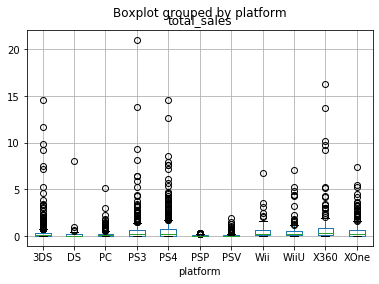

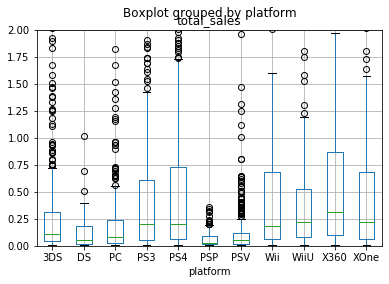

In [ ]:
#строим график "ящик с усами" в разрезе платформ по всему финальному датафрейму (на данных за 10 лет)
games_data_fin.boxplot(column='total_sales', by='platform')
# не очень-то информативно с точки зрения медианных значений - уменьшим ось ординат
axes = games_data_fin.boxplot(column='total_sales', by='platform', return_type='axes')
plt.ylim(0, 2)
plt.show()
#вот так-то лучше, видим, что медианные значения продаж по большинству платформ достаточно близки

# Анализ влияния оценок на продажи
**Теперь рассмотрим влияние оценок на продажи внутри одной популярной платформы на примере PS4.**

Уже по диаграммам рассеяния можно предположить отсутствие взаимосвязи между оценками пользователей и количеством продаж. А вот некоторое влияние оценок критиков явно присутствует.
Это же подтверждают и коэффициенты корреляции, демонстрирующие отсутствие взаимосвязи сумм продаж с оценками пользователей и их слабую взаимосвязь с оценками критиков.

**ВЫВОД: существенного влияния на суммы продаж оценки критиков и пользователей не оказывают.**

Коэффициент корреляции суммарных продаж и оценок критиков равен 0.41
Коэффициент корреляции суммарных продаж и оценок пользователей равен -0.03


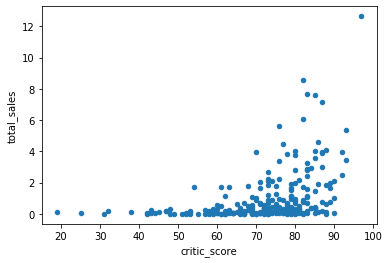

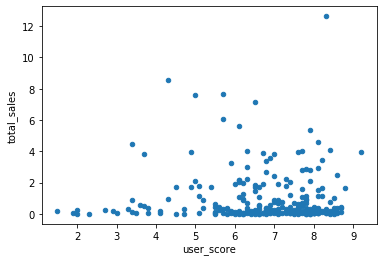

In [ ]:
#отберем данные по PS4
ps4_data = games_data_fin[games_data_fin['platform'] == 'PS4']
#удалим строчки без оценок критиков
ps4_data_critics = ps4_data.dropna(subset=['critic_score'])
#удалим строчки без оценок пользователей
ps4_data_users = ps4_data.dropna(subset=['user_score'])
#построим диаграмму рассеяния для суммарных продаж и оценок критиков. Посчитаем коэффициент корреляции
ps4_data_critics.plot(x='critic_score', y='total_sales', kind='scatter')
print('Коэффициент корреляции суммарных продаж и оценок критиков равен {:.2f}'.format(
    ps4_data_critics['total_sales'].corr(ps4_data_critics['critic_score'])))
#построим диаграмму рассеяния для суммарных продаж и оценок пользователей. Посчитаем коэффициент корреляции
ps4_data_users.plot(x='user_score', y='total_sales', kind='scatter')
print('Коэффициент корреляции суммарных продаж и оценок пользователей равен {:.2f}'.format(
    ps4_data_users['total_sales'].corr(ps4_data_users['user_score'])))

Проверим сделанные в предыдущем пункте выводы:
1) на другой платформе - XOne
2) на всем финальном датафрейме

В обоих случаях сделанные выводы подтвердились. При этом взаимосвязи по XOne более похожи на PS4, чем по всему финальному датафрейму. Это позволяет предположить схожие механизмы формирования продаж по текущим популярным платформам и более специфичные по непопулярным или популярным платформам прошлых лет.

In [ ]:
#отберем данные по XOne
XOne_data = games_data_fin[games_data_fin['platform'] == 'XOne']
#удалим строчки без оценок критиков и пользователей
XOne_data_scores = XOne_data.dropna(subset=['critic_score', 'user_score'])
print('Платформа XOne')
print('Коэффициент корреляции суммарных продаж и оценок критиков равен {:.2f}'.format(
     XOne_data_scores['total_sales'].corr(XOne_data_scores['critic_score'])))
print('Коэффициент корреляции суммарных продаж и оценок пользователей равен {:.2f}'.format(
    XOne_data_scores['total_sales'].corr(XOne_data_scores['user_score'])))

#удалим строчки без оценок критиков и пользователей
games_data_fin_scores = games_data_fin.dropna(subset=['critic_score', 'user_score'])
print('Все платформы')
print('Коэффициент корреляции суммарных продаж и оценок критиков равен {:.2f}'.format(
    games_data_fin_scores['total_sales'].corr(games_data_fin_scores['critic_score'])))
print('Коэффициент корреляции суммарных продаж и оценок пользователей равен {:.2f}'.format(
    games_data_fin_scores['total_sales'].corr(games_data_fin_scores['user_score'])))

Платформа XOne
Коэффициент корреляции суммарных продаж и оценок критиков равен 0.41
Коэффициент корреляции суммарных продаж и оценок пользователей равен -0.09
Все платформы
Коэффициент корреляции суммарных продаж и оценок критиков равен 0.31
Коэффициент корреляции суммарных продаж и оценок пользователей равен 0.00


**Итак, мы уже узнали, что:**

1) платформы бывают прибыльные, а бывают не очень

2) оценки критиков и пользователей серьезного влияния на суммы продаж не оказывают

А что по жанрам? Может быть, есть какие-то жанры, более-менее гарантирующие высокие продажи? Давайте посмотрим на нашем финальном датафрейме **games_data_fin**

In [ ]:
#построим сводную таблицу по жанрам, посчитаем сумму, медиану, кол-во, максимум и минимум продаж
sales_per_genre = games_data_fin.pivot_table(values='total_sales', index=['genre'], 
                                             aggfunc={'sum','median', 'max', 'min', 'count'})
sales_per_genre.sort_values(by='median', ascending=False, inplace=True)
sales_per_genre

,count,max,median,min,sum
genre,,,,,
Shooter,235,14.63,0.440,0.01,304.73
Sports,268,8.58,0.240,0.01,181.07
Platform,85,9.90,0.210,0.01,61.00
Role-Playing,370,14.60,0.140,0.01,192.80
Racing,115,7.09,0.140,0.01,53.50
Fighting,109,7.55,0.130,0.01,44.49
Action,1031,21.05,0.120,0.01,441.12
Misc,192,9.18,0.120,0.01,85.04
Simulation,80,9.17,0.120,0.01,35.12


# Выводы относительно жанров:

1) больше всего игр выпускают в жанре "экшн". Именно к этому жанру относится игра-рекордсмен по продажам за последнюю пятилетку, но при этом медианная сумма сборов для игр этого жанра достаточно серьезно уступает лидерам

2) медианная сумма продаж наибольшая у "шутеров". Второй и третий призер в этой номинации - "бродилки" и "спорт" уступают достаточно существенно

3) максимальную сумму продаж можно собрать с качественного и распиаренного продукта в жанрах Action, Shooter, Role-Playing.

4) стратегии, паззлы и приключения - аутсайдеры как по средним сборам, так и по максимальным

5) провальные игры с минимальными сборами есть во всех жанрах

# ИТОГОВЫЕ ВЫВОДЫ ПО ШАГУ 2:
1) для принятия решений по планам на 2017 год из всей выборки нам достаточно данных за последние 5 лет: 2016, 2015, 2014, 2013, 2012.

2) наиболее популярными (прибыльными) платформами последних лет являются PS4, XOne и 3DS

3) в среднем наиболее прибыльными жанрами последних лет являются Shooter, Platform и Sports. Shooter так же входит в тройку лучших по максимальной прибыли с одной игры вместе с Action и Role-Playing.

4) оценки критиков и пользователей существенного влияния на объем продаж не имеют

# ШАГ 3. <br> СОСТАВЛЕНИЕ ПОРТРЕТА ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА

In [ ]:
games_data_fin.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [ ]:
#посчитаем суммарные затраты пользователей на покупку игр в каждом из 3 регионов
na_sum = games_data_fin['na_sales'].sum()
eu_sum = games_data_fin['eu_sales'].sum()
jp_sum = games_data_fin['jp_sales'].sum()
#добавим в датафрейм столбцы, показывающие, какая доля суммарных затрат региона пришлась на данную игру. 
#По сути это и есть популярность 
games_data_fin['na_ratio'] = games_data_fin['na_sales'] / na_sum
games_data_fin['eu_ratio'] = games_data_fin['eu_sales'] / eu_sum
games_data_fin['jp_ratio'] = games_data_fin['jp_sales'] / jp_sum
#games_data_fin.head()

In [ ]:
# теперь найдем самые популярные платформы каждого региона, т.е. те, на покупку игр которых жители данных регионов потратили 
#больше всего денег
games_data_fin_pp = games_data_fin.pivot_table(values=['na_ratio', 'eu_ratio', 'jp_ratio'], index='platform', aggfunc='sum')
games_data_fin_pp.sort_values(by='na_ratio', ascending=False, inplace=True)
print('Самые популярные платформы в Северной Америке за последние 5 лет', 
      games_data_fin_pp.sort_values(by='na_ratio', ascending=False)['na_ratio'].head())
print('')
print('Самые популярные платформы в Европе за последние 5 лет', 
      games_data_fin_pp.sort_values(by='eu_ratio', ascending=False)['eu_ratio'].head())
print('')
print('Самые популярные платформы в Японии за последние 5 лет', 
      games_data_fin_pp.sort_values(by='jp_ratio', ascending=False)['jp_ratio'].head())

Самые популярные платформы в Северной Америке за последние 5 лет platform
X360    0.236983
PS4     0.184003
PS3     0.174933
XOne    0.157571
3DS     0.093592
Name: na_ratio, dtype: float64

Самые популярные платформы в Европе за последние 5 лет platform
PS4     0.278383
PS3     0.210844
X360    0.147034
XOne    0.101792
3DS     0.084132
Name: eu_ratio, dtype: float64

Самые популярные платформы в Японии за последние 5 лет platform
3DS     0.455862
PS3     0.183249
PSV     0.109253
PS4     0.082875
WiiU    0.067556
Name: jp_ratio, dtype: float64


# Региональные предпочтения по платформам

Для каждого региона мы рассчитали долю затрат пользователей, приходящихся на каждую платформу, и отобрали 5 лидеров.

**Как видим, в каждом регионе свои особенности:**

- в Европе популярна приставка PlayStation - 3-ья и 4-ая версии в сумме забрали почти 50% рынка

- в Северной Америке преимущество на стороне XBox - две последние модели забрали 42%

- а японцы как истинные патриоты предпочтают Nintendo - 46% у 3DS

При этом если в целом по платформам пятерки СА и Европы одинаковы, то в Японии мы видим двух новых фаворитов - PSV и WiiU.

In [ ]:
#Аналогичным образом найдем самые популярные жанры каждого региона

games_data_fin_pp = games_data_fin.pivot_table(values=['na_ratio', 'eu_ratio', 'jp_ratio'], index='genre', aggfunc='sum')
games_data_fin_pp.sort_values(by='na_ratio', ascending=False, inplace=True)
print('Самые популярные жанры в Северной Америке за последние 5 лет', 
      games_data_fin_pp.sort_values(by='na_ratio', ascending=False)['na_ratio'].head())
print('')
print('Самые популярные жанры в Европе за последние 5 лет', 
      games_data_fin_pp.sort_values(by='eu_ratio', ascending=False)['eu_ratio'].head())
print('')
print('Самые популярные жанры в Японии за последние 5 лет', 
      games_data_fin_pp.sort_values(by='jp_ratio', ascending=False)['jp_ratio'].head())

Самые популярные жанры в Северной Америке за последние 5 лет genre
Action          0.300929
Shooter         0.244970
Sports          0.137960
Role-Playing    0.108297
Misc            0.064623
Name: na_ratio, dtype: float64

Самые популярные жанры в Европе за последние 5 лет genre
Action          0.314392
Shooter         0.223886
Sports          0.136321
Role-Playing    0.095754
Racing          0.053846
Name: eu_ratio, dtype: float64

Самые популярные жанры в Японии за последние 5 лет genre
Role-Playing    0.339807
Action          0.274172
Misc            0.066777
Simulation      0.054055
Fighting        0.049019
Name: jp_ratio, dtype: float64


# Региональные предпочтения по жанрам

Для каждого региона мы рассчитали долю затрат пользователей, приходящихся на игры определенного жанра, и отобрали 5 лидеров.

И здесь мы видим, что европейцы с североамериканцами братья навек - разница лишь на 5-ой строчке, остальное совпадает.

А вот Япония - снова отдельный мир. Во-первых, у них другой лидер - **Role-Playing**, а во-вторых, в пятерке два жанра, не особенно любимых европейцами и североамериканцами - **Simulation** и **Fighting**, зато отсутствуют **Sports** и **Shooter**. Оно и понятно, в спорте японцы несильны, а стрелять (иметь армию) им запрещено по итогам Второй Мировой.

Далее рассмотрим влияние рейтинга ESRB на продажи в отдельных регионах.

In [ ]:
# посмотрим какие у нас вообще бывают значения рейтинга
print(games_data_fin.groupby(by=["rating"])['name'].count())
print('')
#видим, что их всего четыре
#теперь посмотрим долю каждого рейтинга в каждом из трех регионов, предварительно исключив из датафрейма
#строки с незаполненным рейтингом
games_data_fin_rating = games_data_fin.dropna(subset=['rating'])
#print(games_data_fin_rating.info())
print('')
#далее как в прошлых пунктах пересчитаем сумму продаж для каждого региона и долю в этой сумме каждой игры
na_sum = games_data_fin_rating['na_sales'].sum()
eu_sum = games_data_fin_rating['eu_sales'].sum()
jp_sum = games_data_fin_rating['jp_sales'].sum()
games_data_fin_rating['na_ratio'] = games_data_fin_rating['na_sales'] / na_sum
games_data_fin_rating['eu_ratio'] = games_data_fin_rating['eu_sales'] / eu_sum
games_data_fin_rating['jp_ratio'] = games_data_fin_rating['jp_sales'] / jp_sum
#print(games_data_fin_rating.head())
#и строим сводную таблицу долей продаж по регионам в разрезе рейтинга
games_data_fin_pr = games_data_fin_rating.pivot_table(values=['na_ratio', 'eu_ratio', 'jp_ratio'], index='rating', aggfunc='sum')
games_data_fin_pr

rating
E       395
E10+    306
M       498
T       412
Name: name, dtype: int64




,eu_ratio,jp_ratio,na_ratio
rating,,,
E,0.272152,0.338309,0.234528
E10+,0.133319,0.097803,0.155231
M,0.467013,0.253165,0.474860
T,0.127516,0.310724,0.135381


# ВЛИЯНИЕ РЕЙТИНГА ESRB на продажи

Для начала мы посмотрели - нет ли в нашем датафрейме существенного дисбаланса, когда одних значений рейтинга гораздо больше, чем других. К счастью такого не наблюдается: самого частого рейтинга M менее, чем 2 раза больше, чем самого самого редкого E10+ - 498 и 306 соответственно.

Как видим, рейтинг на продажи влияет, причем в каждом регионе по своему. 

В Европе наиболее часто покупают "взрослые" игры (рейтинг М). Их покупают в 3 раза чаще, чем E10+ (для всех, кто старше 10 лет), в 4, чем Т (тинейджеры). В Северной Америке картина примерно такая же. А вот в Японии на удивление продажи M, T и E примерно равны.

**О чем это может говорить?** Возможно, в СА и ЕС в игры чаще играют взрослые люди, чем в Японии. Но также можно допустить и тот факт, что японцы просто более дисциплинированный народ, и японские подростки в большинстве своем приобретают игры своей возрастной категории, в отличие от европейских, которые берут, что хотят, не взирая на возрастной рейтинг. Скорее же всего, по моему опыту взаимодействия с представителями этих наций, имеют место оба предположения.



# ИТОГОВЫЙ ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ РЕГИОНА

**Европа:**
- предпочтает PlayStation
- любимый жанры "экшн" и "шутер"
- достаточно высокий средний возраст игрока
- недостаточно дисциплинированные игроки-дети/тинейджеры

**Северная Америка**
похожа на Европу, но в основном играет на XBox

**Япония** же является особым миром:
- играет на Nintendo (3DS)
- не любит "шутеры", зато обожает "ролевки"
- средний возраст игрока ниже, чем в других регионах
- дети/тинейджеры более дисциплинированны в части учета возрастного рейтинга игры

**Если мы будем собираться делать или продавать игру для какого-то конкретного региона, то эти особенности необходимо будет учесть.**

# ШАГ 4. <br>ИССЛЕДОВАНИЕ СТАТИСТИЧЕСКИХ ПОКАЗАТЕЛЕЙ

In [ ]:



#исследуем как изменяются оценки критиков и пользователей для различных жанров
# для начала удалим из нашей таблицы строки с пустыми оценками - они нам больше не понадобятся
games_data_fin_score = games_data_fin.dropna(subset=['user_score', 'critic_score'])

#запускаем цикл по жанрам и считаем нужные статистики: среднее, дисперсию, стандартное отклонение
for genre in games_data_fin_score['genre'].unique():
    print('Описательные статистики для жанра ', genre)
    print('----------------------')
    print('для оценки user_score')
    print('Среднее значение {:.2f}'.format(games_data_fin_score[games_data_fin_score['genre'] == genre]['user_score'].mean()))
    print('Дисперсия {:.2f}'.format(np.var(games_data_fin_score[games_data_fin_score['genre'] == genre]['user_score'])))
    print('Стандартное отклонение {:.2f}'.format(np.std(games_data_fin_score[games_data_fin_score['genre'] == genre]['user_score'])))
    print('----------------------')
    print('для оценки critic_score')
    print('Среднее значение {:.2f}'.format(games_data_fin_score[games_data_fin_score['genre'] == genre]['critic_score'].mean()))
    print('Дисперсия {:.2f}'.format(np.var(games_data_fin_score[games_data_fin_score['genre'] == genre]['critic_score'])))
    print('Стандартное отклонение {:.2f}'.format(np.std(games_data_fin_score[games_data_fin_score['genre'] == genre]['critic_score'])))
    print('')

Описательные статистики для жанра  Action
----------------------
для оценки user_score
Среднее значение 6.90
Дисперсия 1.75
Стандартное отклонение 1.32
----------------------
для оценки critic_score
Среднее значение 71.50
Дисперсия 144.40
Стандартное отклонение 12.02

Описательные статистики для жанра  Shooter
----------------------
для оценки user_score
Среднее значение 6.46
Дисперсия 2.10
Стандартное отклонение 1.45
----------------------
для оценки critic_score
Среднее значение 73.48
Дисперсия 155.48
Стандартное отклонение 12.47

Описательные статистики для жанра  Platform
----------------------
для оценки user_score
Среднее значение 6.94
Дисперсия 2.64
Стандартное отклонение 1.63
----------------------
для оценки critic_score
Среднее значение 74.59
Дисперсия 188.04
Стандартное отклонение 13.71

Описательные статистики для жанра  Simulation
----------------------
для оценки user_score
Среднее значение 6.62
Дисперсия 3.23
Стандартное отклонение 1.80
----------------------
для оценки 

Гистограммы пользовательских оценок по жанрам


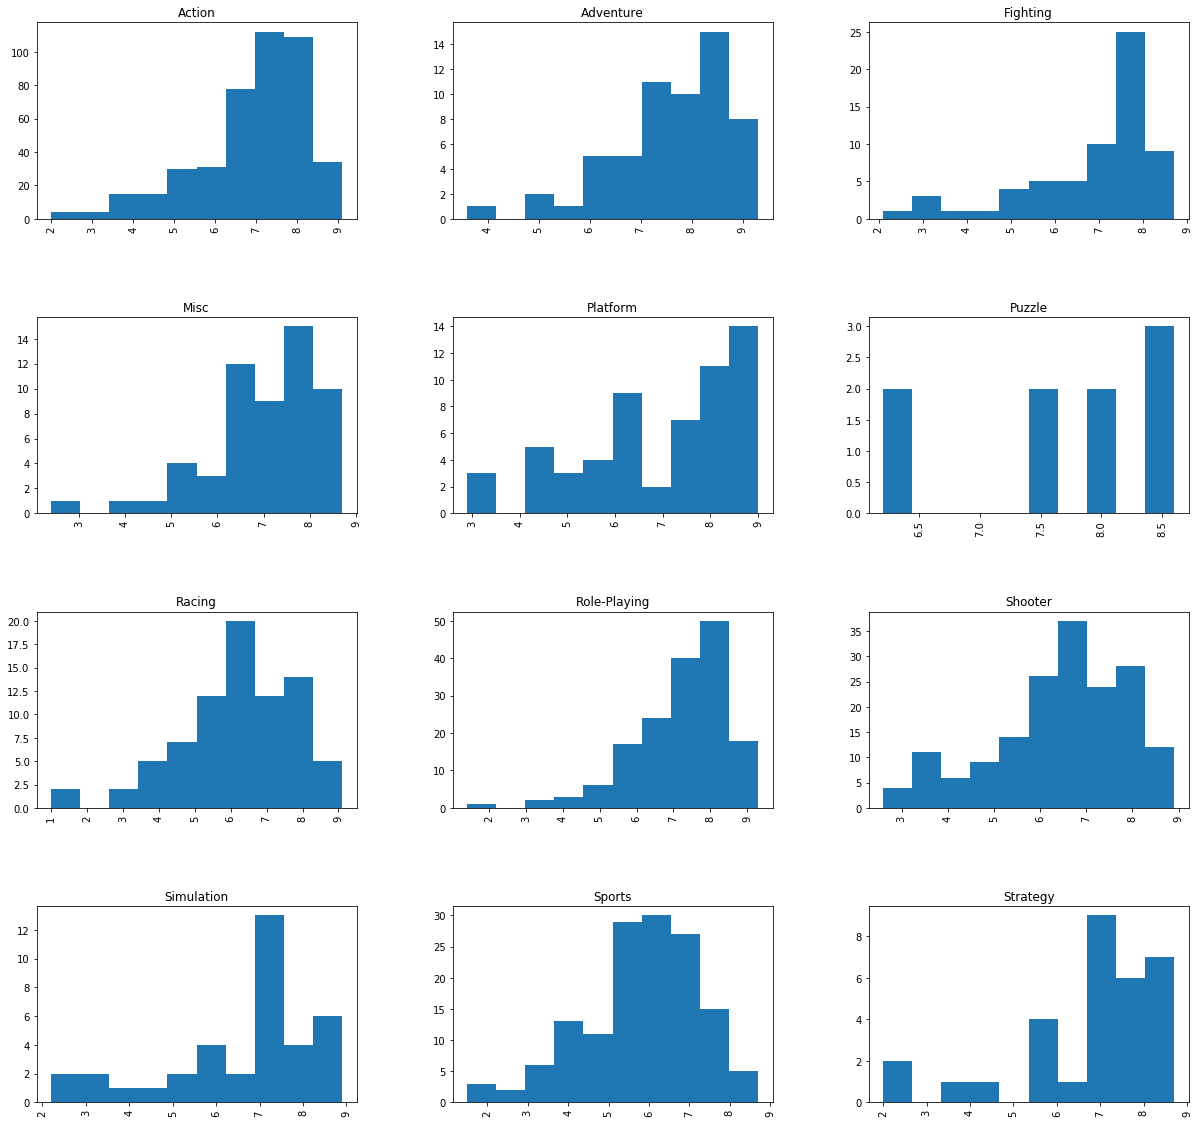

In [ ]:
# построим гистограммы пользовательских оценок по жанрам
print('Гистограммы пользовательских оценок по жанрам')
games_data_fin_score['user_score'].hist(by=games_data_fin_score['genre'], figsize=(20,20), bins=10)
plt.show()

Гистограммы оценок критиков по жанрам


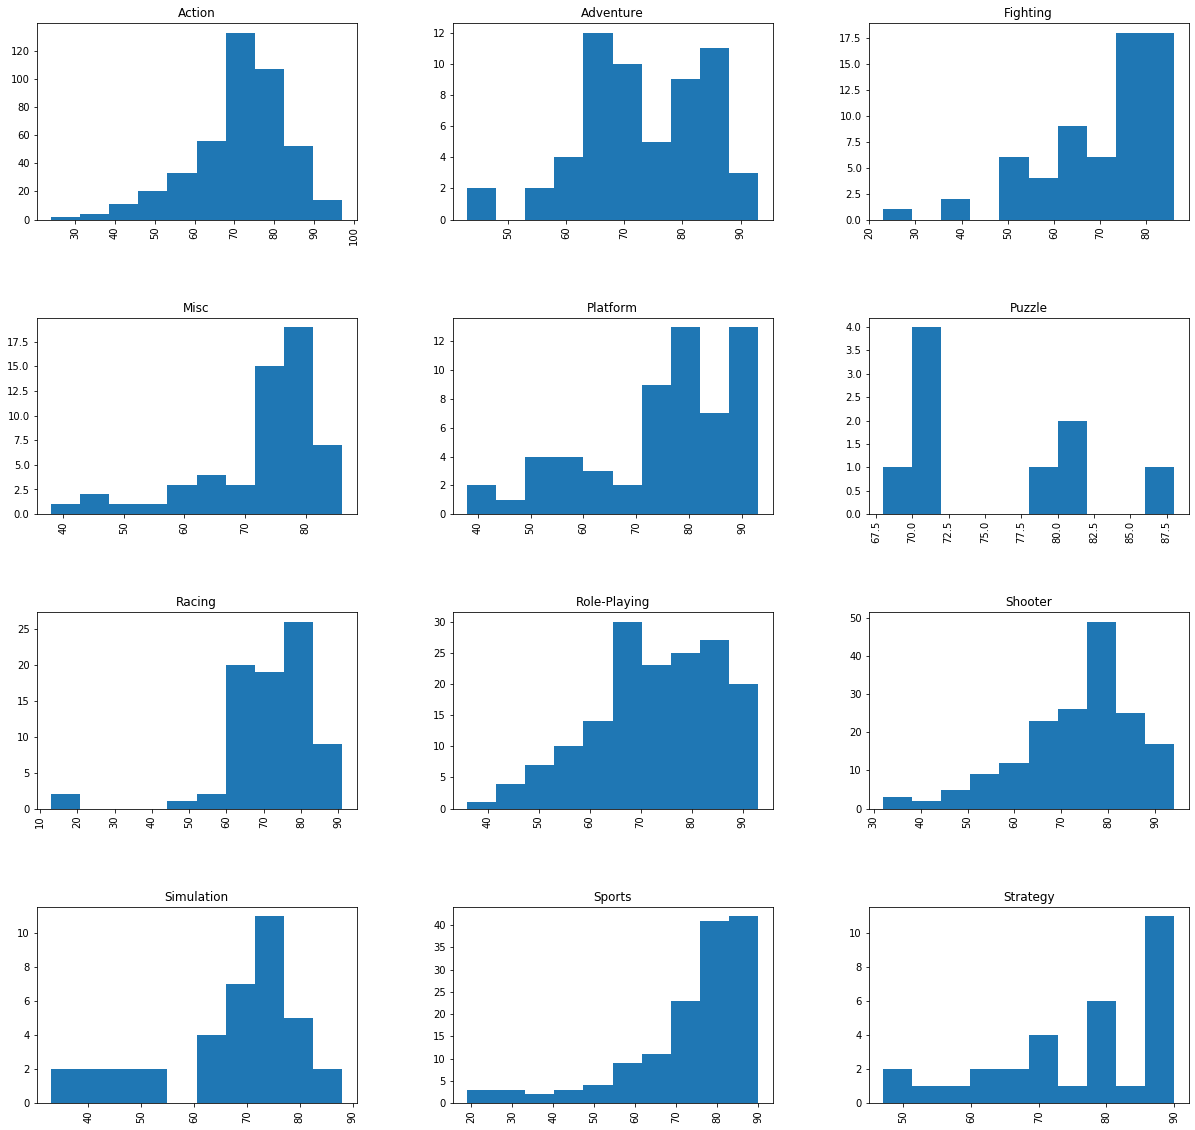

In [ ]:
# построим гистограммы оценок критиков по жанрам
print('Гистограммы оценок критиков по жанрам')
games_data_fin_score['critic_score'].hist(by=games_data_fin_score['genre'], figsize=(20,20), bins=10)
plt.show()

# ВЫВОД ПО РАЗДЕЛУ

Мы рассчитали описательные статистики по оценкам пользователей и критиков и построили гистограммы их распределения для разных жанров.

Мы видим, что гистограммы оценок пользователей и критиков для разных жанров сильно различаются, но у них у всех есть общее свойства:

**1) скошенность влево**

**2) наличие ярко выраженных пиков**

Т.о. на первый взгляд нормальным распределением оценок здесь и не пахнет.

# ШАГ 5. ПРОВЕРКА ГИПОТЕЗ

Проверим гипотезу об одинаковости средних пользовательских рейтингов платформ XOne и PC

**H0:** *mean(XOne) = mean(PC)*

**H1:** *mean(XOne) != mean(PC)*

Сразу видим, что гипотеза двухсторонняя. Для проверки применим критерий Стьюдента для независимых выборок, т.к. нет оснований считать, что оценки игр разных платформ зависят друг от друга.

Уровень значимости берем классический - 5%.

In [ ]:


#проводим тест по критерию Стьюдента
results = st.ttest_ind(games_data_fin_score[games_data_fin_score['platform'] == 'XOne']['user_score'], 
                       games_data_fin_score[games_data_fin_score['platform'] == 'PC']['user_score'], equal_var = True)
# equal_var взял True, т.к. нет оснований считать дисперсии различными. Впрочем, я поэкспериментировал с этим значением -
#в данном случае на результат оно не влияет.
print('p-значение: {:.3f}'.format(results.pvalue))
alpha = 0.05
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

p-значение: 0.599
Нет оснований отвергнуть нулевую гипотезу


**Вывод:**

Таким образом, мы не можем отвергнуть нулевую гипотезу об одинаковости средних пользовательских оценок для платформ XOne и PC.

# Проверка гипотез. Часть 2

Проверим гипотезу о том, что средние пользовательские рейтинги игр жанров Action и Sports различаются.
Пойдем от обратного, сформулируем нулевую гипотезу об их равенстве.

**H0:** *mean(Action) = mean(Sports)*
    
**H1:** *mean(Action) != mean(Sports)*

Сразу видим, что гипотеза двухсторонняя.

Для проверки применим критерий Стьюдента для независимых выборок, т.к. нет оснований считать, что оценки игр разных жанров зависят друг от друга.

Кроме того, как мы посчитали ранее, дисперсии этих групп различаются несильно, так что в статистическом Т-тесте будем считать их равными.

Уровень значимости берем классический - 5%.

In [ ]:
#проводим тест по критерию Стьюдента
results = st.ttest_ind(games_data_fin_score[games_data_fin_score['genre'] == 'Action']['user_score'], 
                       games_data_fin_score[games_data_fin_score['genre'] == 'Sports']['user_score'], equal_var = True)
# equal_var взял True, т.к. нет оснований считать дисперсии различными. Впрочем, я поэкспериментировал с этим значением -
#в данном случае на результат оно не влияет.
print('p-значение: {:.3f}'.format(results.pvalue))
alpha = 0.05
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

p-значение: 0.000
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу о равенстве средних пользовательских оценок игр для жанров Action и Sports, следовательно **мы не имеем оснований отвергнуть** альтернативную **гипотезу о том, что эти средние оценки различаются**, а именно это нам и хотелось выяснить.

При этом отмечу, что не все нулевые гипотезы о равенстве средних оценок в разрезе жанров так легко отвергаются. Например, отвергнуть нулевую гипотезу о равенстве средних пользовательских оценок игр для жанров Action и Fighting нам бы не удалось.

# ОБЩИЙ ВЫВОД

В рамках данного исследования мы:

1. Определили период времени, данные за который нам полезны в проведении анализа с целью выбора "фаворитов" 2017 года.

2. Выявили самые популярные платформы (**PS4, XOne и 3DS**) и самые популярные жанры (**Shooter, Sports, Platform**) последних пяти лет. **Именно на игры этих платформ и жанров стоит сделать ставку в 2017 году.** Суперкомбо может быть игра жанра Shooter на платформе PS4.

3. Составили портрет среднестатистического пользователя различных регионов. **Если нам понадобится экспансия на конкретный рынок, то эти "портреты" необходимо будет учесть.**

4. Установили, что вопреки ожиданиям оценки критиков и пользователей не оказывают существенного влияния на суммы продаж. **Следовательно нет острой необходимости "спонсировать" критиков.**

5. Дополнительно исследовали оценки пользователей и критиков, проверили статистические гипотезы об их равенстве в разрезе платформ и жанров. На примере столь разных платформ, как XBox и PC, мы установили, что на разных платформах средние оценки вполне себе могут быть одинаковыми, а вот у разных жанров как правило различаются.